In [2]:
# task 2.1.1. Define the Hydrogen 1s Orbital and its Laplacian

import numpy as np

# Define the Bohr radius
a0 = 1.0

# check point 2.1.1-1) Hydrogen 1s wavefunction in Cartesian coordinates
def psi_1s(x, y, z, Z=1, a0=1.0):
    """
    Computes the hydrogen 1s orbital wavefunction ψ1s at a given point (x, y, z) in Cartesian coordinates.

    Parameters:
    x (float): x-coordinate of the point.
    y (float): y-coordinate of the point.
    z (float): z-coordinate of the point.
    Z (int): Atomic number (default is 1 for hydrogen).
    a0 (float): Bohr radius in atomic units.

    Returns:
    float: The value of the 1s wavefunction at the given point.
    """
    r = np.sqrt(x**2 + y**2 + z**2)
    return (Z**(3/2) / np.sqrt(np.pi * a0**3)) * np.exp(-Z * r / a0)

# Compute the Laplacian of the hydrogen 1s orbital
def laplacian_psi_1s(x, y, z, Z=1, a0=1.0):
    """
    Computes the Laplacian of the hydrogen 1s orbital wavefunction at a given point (x, y, z) in Cartesian coordinates.

    Parameters:
    x (float): x-coordinate of the point.
    y (float): y-coordinate of the point.
    z (float): z-coordinate of the point.
    Z (int): Atomic number (default is 1 for hydrogen).
    a0 (float): Bohr radius in atomic units.

    Returns:
    float: The value of the Laplacian of the 1s wavefunction at the given point.
    """
    r = np.sqrt(x**2 + y**2 + z**2)
    if r == 0:
        return 0
    # Compute the expression
    numerator = (-2 * a0 + r) * np.exp(-r / a0)
    denominator = np.sqrt(np.pi * a0**3) * r * a0**2
    # Final expression
    laplacian = numerator / denominator
    return laplacian


N = 100: Kii = -0.027863596775034884
N = 1000: Kii = 0.8710102495733008
N = 10000: Kii = 0.44403406813680657
N = 100000: Kii = 0.5333271510716474
N = 1000000: Kii = 0.48171207645344355
N = 10000000: Kii = 0.49514155916302366
N = 100000000: Kii = 0.5004893062059147


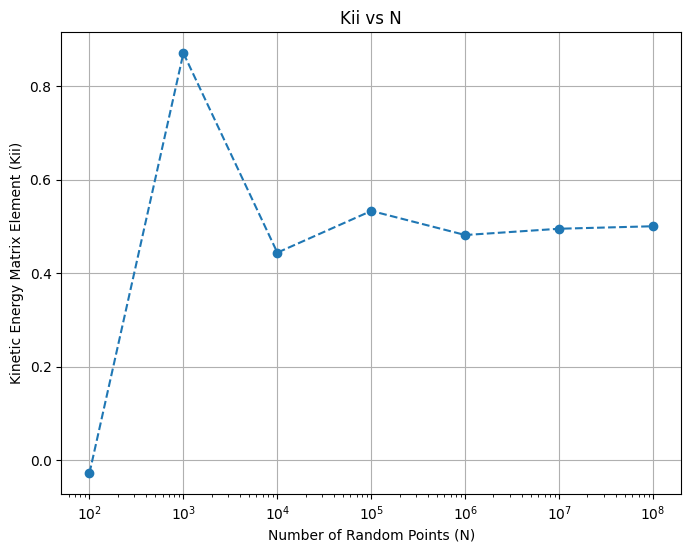

In [3]:
# task 2.1.2. Compute the Diagonal Kinetic Energy Mtrix Element Using Random Sampling
import matplotlib.pyplot as plt

# check point 2.1.2-1) check the diagonal kinetic energy matrix element

# Define the Bohr radius
a0 = 1.0

# Monte Carlo Integration for Kii (diagonal kinetic energy matrix element)
def monte_carlo_Kii(N, L):
    """
    Computes the diagonal kinetic energy matrix element Kii using Monte Carlo integration.

    Parameters:
    N (int): Number of random points to sample.
    L (float): Half-length of the cubic region for integration.

    Returns:
    float: The estimated value of the diagonal kinetic energy matrix element Kii.
    """
    # check point 2.1.2-2)Generate random points in the cubic region [-L, L]
    x = np.random.uniform(-L, L, N)
    y = np.random.uniform(-L, L, N)
    z = np.random.uniform(-L, L, N)
    
    # Compute the integrand -1/2 * psi_1s * Laplacian(psi_1s)
    integrand = np.array([
        (-0.5) * psi_1s(x[i], y[i], z[i]) * laplacian_psi_1s(x[i], y[i], z[i])
        for i in range(N)
    ])
    
    # check point 2.1.2-3) Compute the average value of the integrand
    integrand_avg = np.mean(integrand)
    
    # Compute the volume of the cubic region
    volume = (2 * L) ** 3
    
    # check point 2.1.2-4) Estimate Kii
    Kii = volume * integrand_avg
    return Kii

# Parameters
L = 7.0  # Cube size for integration limits

# check point 2.1.2-5) Number of samples for Monte Carlo integration
N_values = [10**2, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8]

# check point 2.1.2-6) Array to store the results
Kii_values = []

# Set random seed for reproducibility
np.random.seed(42)

# Perform the Monte Carlo integration for each N
for N in N_values:
    Kii = monte_carlo_Kii(N, L)
    Kii_values.append(Kii)
    print(f"N = {N}: Kii = {Kii}")

# check point 2.1.2-7) Plotting Kii versus N on a logarithmic scale
plt.figure(figsize=(8,6))
plt.plot(N_values, Kii_values, marker='o', linestyle='--')
plt.xscale('log')
plt.xlabel('Number of Random Points (N)')
plt.ylabel('Kinetic Energy Matrix Element (Kii)')
plt.title('Kii vs N')
plt.grid(True)
plt.show()

# check point 2.1.2-8) Briefly discuss the convergence of your results
# The convergence of the results for task 2.1.2 shows an initial fluctuation, particularly for lower values of N, where the result changes drastically between 100 and 1000.
# After reaching 10^4 points, the results begin to stabilize, indicating that a sufficient number of random points are necessary to achieve reliable estimates. 
# The fluctuation in early iterations is typical in Monte Carlo integration, where a small sample size leads to high variability. 
# As N increases, the result gradually converges toward a stable value, demonstrating the benefit of larger sample sizes for better accuracy.

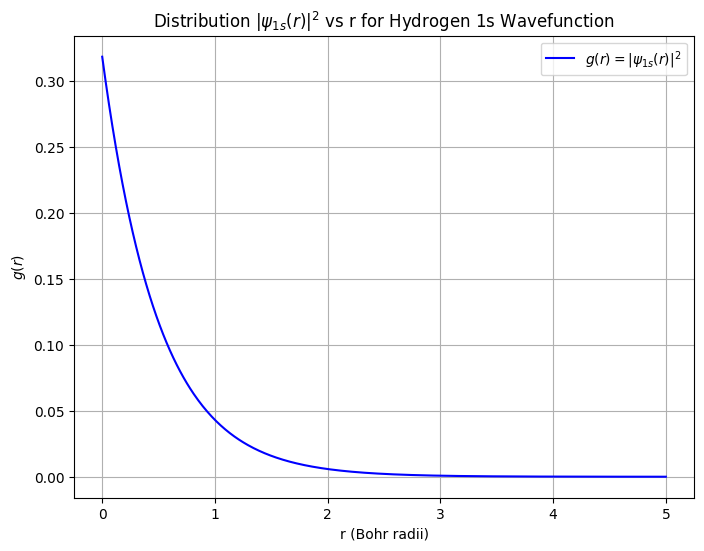

In [4]:
# check point 2.1.3-1) Choose an importance sampling distribution g(x, y, z) approximately proportional

# plotting |ψ_1s(r)|^2 to find g(x) model
# Define the function for |ψ_1s(r)|^2
def g_distribution(r, a_0):
    return (1 / (np.pi * a_0**3)) * np.exp(-2 * r / a_0)

# Define the Bohr radius
a0 = 1.0

# Create a range of r values from 0 to 5 Bohr radii
r_values = np.linspace(0, 5*a0, 500)

# Compute the g_distribution values for the given r values
g_values = g_distribution(r_values, a0)

# Plot the g_distribution function
plt.figure(figsize=(8,6))
plt.plot(r_values, g_values, label=r'$g(r) = |\psi_{1s}(r)|^2$', color='b')
plt.xlabel('r (Bohr radii)')
plt.ylabel(r'$g(r)$')
plt.title(r'Distribution $|\psi_{1s}(r)|^2$ vs r for Hydrogen 1s Wavefunction')
plt.grid(True)
plt.legend()
plt.show()

N = 100: Kii (Importance Sampling with Exponential) = 0.4674848039856075
N = 1000: Kii (Importance Sampling with Exponential) = 0.4770230741138486
N = 10000: Kii (Importance Sampling with Exponential) = 0.4744287038603653
N = 100000: Kii (Importance Sampling with Exponential) = 0.49383845001608634
N = 1000000: Kii (Importance Sampling with Exponential) = 0.5003750565693018
N = 10000000: Kii (Importance Sampling with Exponential) = 0.4998412782432613
N = 100000000: Kii (Importance Sampling with Exponential) = 0.4999096035090188


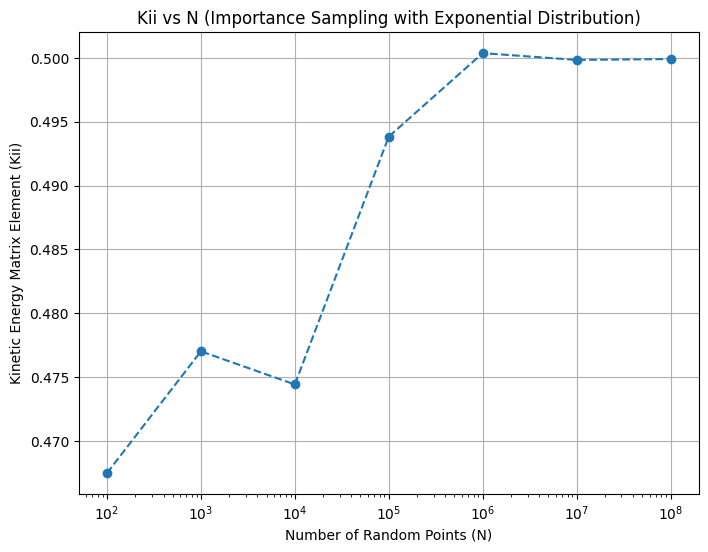

In [5]:
# task 2.1.3. Compute the Diagonal Kinetic Energy Mtrix Element Using importance Sampling
from scipy.stats import expon

# Define the Bohr radius
a0 = 1.0

# check point 2.1.3-2) Since ψ1s(r) is spherically symmetric, consider using a Gaussian distribution for r
# I sampled the x, y, z from exponential model because the |ψ1s(x, y, z)|2 shape is exponential. If we broaden the space to 3D , then it also follows the gaussian distribution. 

# check point 2.1.3-3) Sample x, y, and z from the Gaussian distribution
# Therefore, similar to the Lecture 13, I choose exponential model and consider 1st quadrant. After that, I will multiply 8.

# check point 2.1.3-4) Adjust the integrand by dividing by g(x, y, z)
# Monte Carlo Integration for Kii with Importance Sampling using Exponential distribution for x, y, z
def monte_carlo_Kii_importance_exponential(N, Z=1, a0=1.0):
    """
    Computes the diagonal kinetic energy matrix element Kii using Monte Carlo integration with importance sampling.

    Parameters:
    N (int): Number of random points to sample.
    Z (int): Atomic number (default is 1 for hydrogen).
    a0 (float): Bohr radius in atomic units.

    Returns:
    float: The estimated value of the diagonal kinetic energy matrix element Kii.
    """
    # Sample x, y, z independently from exponential distribution
    x = expon.rvs(scale=1, size=N)
    y = expon.rvs(scale=1, size=N)
    z = expon.rvs(scale=1, size=N)
    
    # Numerator: Overlap between psi_1s and its Laplacian
    numer = np.array([
        (-0.5) * psi_1s(x[i], y[i], z[i], Z, a0) * laplacian_psi_1s(x[i], y[i], z[i], Z, a0) 
        for i in range(N)
    ])
    
    # Denominator: Product of the PDFs for x, y, z under the exponential distribution
    denom = expon.pdf(x) * expon.pdf(y) * expon.pdf(z)  # Product of the exponential PDFs for x, y, z
    
    # Compute the integrand
    integrand = numer / denom

    # Estimate Kii using the average integrand and multiply by 8 to account for all octants
    Kii = 8 * np.mean(integrand)
    
    return Kii


# check point 2.1.3-5) Use the same N values as before
N_values = [10**2, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8]

# # check point 2.1.3-6) Record the estimated values of Kii
Kii_values_importance = []

# Set random seed for reproducibility
np.random.seed(42)

# Perform the Monte Carlo integration for each N using importance sampling with exponential distribution
for N in N_values:
    Kii_importance = monte_carlo_Kii_importance_exponential(N, Z=1)
    Kii_values_importance.append(Kii_importance)
    print(f"N = {N}: Kii (Importance Sampling with Exponential) = {Kii_importance}")

#check point 2.1.3-7) Plot the estimated Kii versus N on a logarithmic scale.
plt.figure(figsize=(8,6))
plt.plot(N_values, Kii_values_importance, marker='o', linestyle='--')
plt.xscale('log')
plt.xlabel('Number of Random Points (N)')
plt.ylabel('Kinetic Energy Matrix Element (Kii)')
plt.title('Kii vs N (Importance Sampling with Exponential Distribution)')
plt.grid(True)
plt.show()

# check point 2.1.3-8) Compare the efficiency and convergence of importance sampling with random sampling
# In comparing the efficiency and convergence of the two methods, task 2.1.3 (importance sampling) is much more efficient, converging to a stable result within a shorter time compared to task 2.1.2 (random sampling), which took around 10 minutes. 
# Both graphs show similar patterns of convergence (~0.499 - 0.5), but the importance sampling method and random sampling require similar points to stabilize in this problem. 
# For the time aspect, the importance sampling is a better approach for reducing computation time.

N = 100: Kij = -0.024069900892083836
N = 1000: Kij = 0.5078588988013459
N = 10000: Kij = 0.19375450824019635
N = 100000: Kij = 0.20191064561522984
N = 1000000: Kij = 0.212663813940241
N = 10000000: Kij = 0.21248602743016118
N = 100000000: Kij = 0.21477743887152975


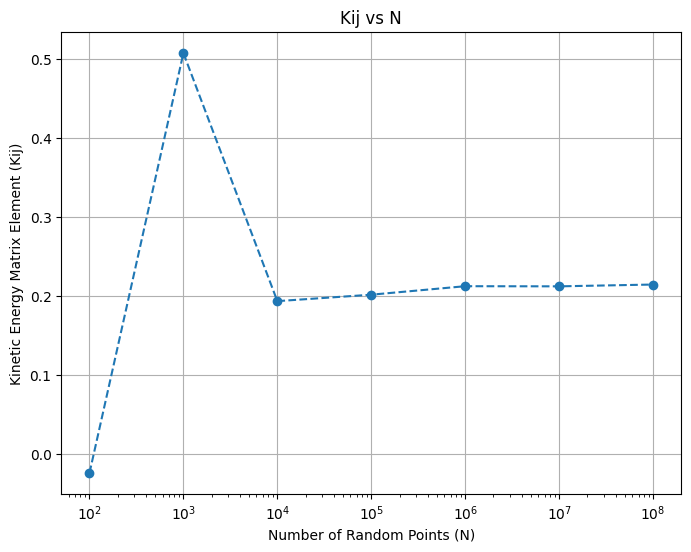

In [6]:
# 2.1.4 Compute the Off-Diagonal Kinetic Energy Matrix Element Using Random Sampling

# check point 2.1.4-1) The off-diagonal kinetic energy matrix element between two 1s orbitals centered at R/2 and −R/2 along the z-axis

# Define the Bohr radius
a0 = 1.0

# Monte Carlo Integration for Kij (off-diagonal kinetic energy matrix element)
def monte_carlo_Kij(N, L, Rz):
    """
    Computes the off-diagonal kinetic energy matrix element Kij using Monte Carlo integration.

    Parameters:
    N (int): Number of random points to sample.
    L (float): Half-length of the cubic region for integration.
    Rz (float): Separation distance between the two hydrogen atoms along the z-axis.

    Returns:
    float: The estimated value of the off-diagonal kinetic energy matrix element Kij.
    """
    # # check point 2.1.4-2) Generate random points in the cubic region [-L, L]
    x = np.random.uniform(-L, L, N)
    y = np.random.uniform(-L, L, N)
    z = np.random.uniform(-L, L, N)
    
    # Compute the integrand -1/2 * psi_1s(x, y, z + Rz/2) * Laplacian(psi_1s(x, y, z - Rz/2))
    integrand = np.array([
        (-0.5) * psi_1s(x[i], y[i], z[i] + Rz / 2) * laplacian_psi_1s(x[i], y[i], z[i] - Rz / 2)
        for i in range(N)
    ])
    
    # # check point 2.1.4-3) Compute the average value of the integrand
    integrand_avg = np.mean(integrand)
    
    # Compute the volume of the cubic region
    volume = (2 * L) ** 3
    
    # # check point 2.1.4-4) Estimate Kij
    Kij = volume * integrand_avg
    return Kij

# Parameters
L = 7.0  # Cube size for integration limits
Rz = 1.4 # Separation distance between the two hydrogen atoms

# # check point 2.1.4-5) Number of samples for Monte Carlo integration
N_values = [10**2, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8]

# check point 2.1.4-6) Record Kij
Kij_values = []

# Set random seed for reproducibility
np.random.seed(42)

# Perform the Monte Carlo integration for each N
for N in N_values:
    Kij = monte_carlo_Kij(N, L, Rz)
    Kij_values.append(Kij)
    print(f"N = {N}: Kij = {Kij}")

# check point 2.1.4-7) Plotting Kij versus N on a logarithmic scale
plt.figure(figsize=(8,6))
plt.plot(N_values, Kij_values, marker='o', linestyle='--')
plt.xscale('log')
plt.xlabel('Number of Random Points (N)')
plt.ylabel('Kinetic Energy Matrix Element (Kij)')
plt.title('Kij vs N')
plt.grid(True)
plt.show()

# check point 2.1.2-8) Briefly discuss the convergence of your results
# The convergence of the results for task 2.1.4 follows a similar pattern as in task 2.1.2, where the initial estimates for small sample sizes (100 to 1000) show significant fluctuation. 
# After reaching 10000, the values begin to stabilize, with further increases in N showing much smaller changes. This suggests that the importance sampling method becomes more reliable as N increases. 
# The plot shows that the solution converges well for N values of 10^5 and beyond, indicating that larger sample sizes are necessary for accurate estimations.

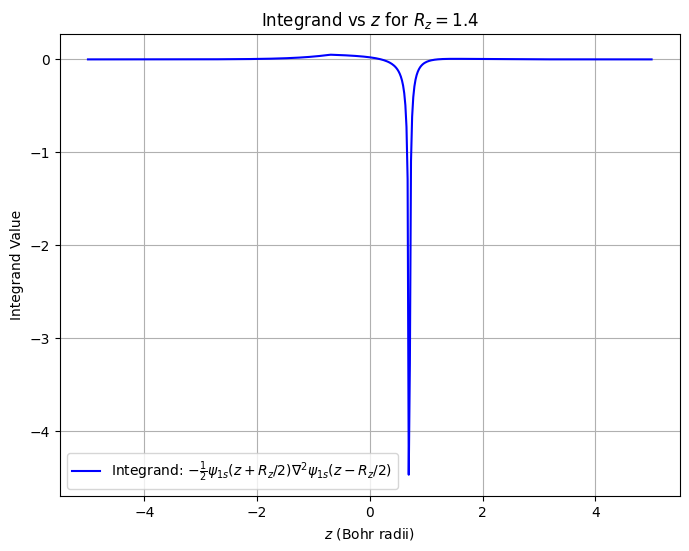

In [7]:
# 2.1.5 Compute the Off-Diagonal Kinetic Energy Matrix Element Using Importance Sampling

# # check point 2.1.5-1) Choose g(x, y, z) that captures the regions where the product of the orbitals is significant
# To find g(x,y,z), I tried to plot the integrand

# Define the Bohr radius
a0 = 1.0

# Define the integrand function as per the equation
def integrand(x, y, z, Z=1, Rz=1.4, a0=1.0):
    """
    Computes the integrand for the off-diagonal kinetic energy matrix element.

    Parameters:
    x (float): x-coordinate of the point.
    y (float): y-coordinate of the point.
    z (float): z-coordinate of the point.
    Z (int): Atomic number (default is 1 for hydrogen).
    Rz (float): Separation distance between the two hydrogen atoms along the z-axis.
    a0 (float): Bohr radius in atomic units.

    Returns:
    float: The value of the integrand at the given point.
    """
    # Psi_1s at (x, y, z + Rz / 2)
    psi_1s_plus = psi_1s(x, y, z + Rz / 2, Z, a0)
    # Laplacian of Psi_1s at (x, y, z - Rz / 2)
    laplacian_psi_1s_minus = laplacian_psi_1s(x, y, z - Rz / 2, Z, a0)
    # Compute the integrand
    return -0.5 * psi_1s_plus * laplacian_psi_1s_minus

# Define the range of z values to plot
z_values = np.linspace(-5, 5, 500)

# Fixed value for x, y
x = 0.0
y = 0.0

# Compute the integrand at each z point
integrand_values = integrand(x, y, z_values)

# Plotting the integrand
plt.figure(figsize=(8,6))
plt.plot(z_values, integrand_values, label=r'Integrand: $-\frac{1}{2} \psi_{1s}(z + R_z/2) \nabla^2 \psi_{1s}(z - R_z/2)$', color='b')
plt.xlabel(r'$z$ (Bohr radii)')
plt.ylabel('Integrand Value')
plt.title(r'Integrand vs $z$ for $R_z = 1.4$')
plt.grid(True)
plt.legend()
plt.show()

# As a result, the model was chosen as gaussian distribution and the significant region was Rz = 1.4

N = 100: Kij (Importance Sampling with norm.pdf) = 0.35399347818936006
N = 1000: Kij (Importance Sampling with norm.pdf) = 0.49865277968969174
N = 10000: Kij (Importance Sampling with norm.pdf) = 0.49717003219760036
N = 100000: Kij (Importance Sampling with norm.pdf) = 0.507519517727463
N = 1000000: Kij (Importance Sampling with norm.pdf) = 0.5013999281344115
N = 10000000: Kij (Importance Sampling with norm.pdf) = 0.5008898045150753
N = 100000000: Kij (Importance Sampling with norm.pdf) = 0.5001119014006433


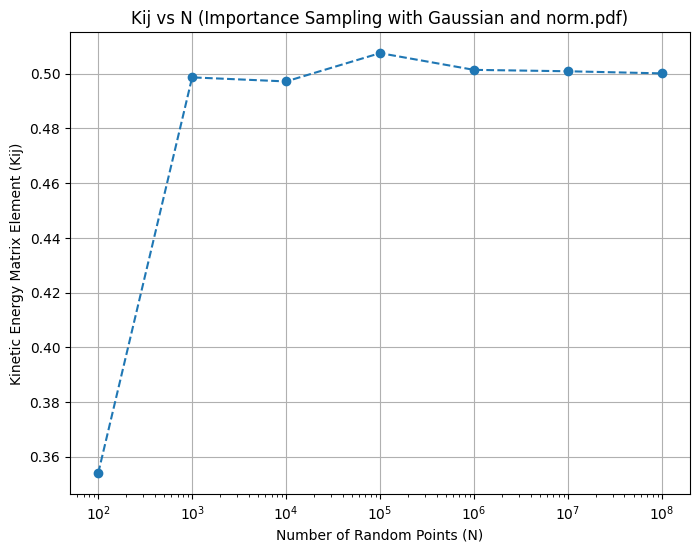

In [8]:
# 2.1.5 Compute the Off-Diagonal Kinetic Energy Matrix Element Using Importance Sampling

from scipy.stats import norm

# Define the Bohr radius
a0 = 1.0

# check point 2.1.5-3) Sampling using Gaussian Sampling

c

# check point 2.1.5-7) Plotting Kij versus N on a logarithmic scale for importance sampling
plt.figure(figsize=(8,6))
plt.plot(N_values, Kij_values_importance, marker='o', linestyle='--')
plt.xscale('log')
plt.xlabel('Number of Random Points (N)')
plt.ylabel('Kinetic Energy Matrix Element (Kij)')
plt.title('Kij vs N (Importance Sampling with Gaussian and norm.pdf)')
plt.grid(True)
plt.show()

# check point 2.1.3-8) Compare the efficiency and convergence of importance sampling with random sampling
# In task 2.1.5, the use of importance sampling with Gaussian sampling and the norm.pdf function demonstrates a faster convergence compared to random sampling methods. 
# As seen in the plot, the value of Kij stabilizes around N=1000, whereas in random sampling methods, convergence typically requires larger values of N. The efficiency of importance sampling is reflected in the more stable behavior at smaller 𝑁 values.
# This suggests that importance sampling more accurately focuses on regions where the integral contributes significantly, improving computational efficiency and reducing variance.

In [9]:
pip install sympy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


In [9]:
# Checking with sympy

import sympy as sp

# Define symbols for x, y, z, Z (atomic number), and a0 (Bohr radius)
x, y, z, a0 = sp.symbols('x y z a0')

# Define r in Cartesian coordinates
r = sp.sqrt(x**2 + y**2 + z**2)

# Define the hydrogen 1s wavefunction
psi_1s = (1 / sp.sqrt(sp.pi * a0**3)) * sp.exp(-r / a0)

# Compute the Laplacian (nabla^2) of psi_1s
laplacian_psi_1s = sp.diff(psi_1s, x, x) + sp.diff(psi_1s, y, y) + sp.diff(psi_1s, z, z)

# Simplify the result
laplacian_psi_1s_simplified = sp.simplify(laplacian_psi_1s)

# Display the result
laplacian_psi_1s_simplified


(-2*a0 + sqrt(x**2 + y**2 + z**2))*exp(-sqrt(x**2 + y**2 + z**2)/a0)/(sqrt(pi)*a0**2*sqrt(x**2 + y**2 + z**2)*sqrt(a0**3))